## author: Levon Abramian, J4132
## Task 1. Experimental time complexity analysis

## Goal: Experimental study of the time complexity of different algorithms

In this work we will try to experiment with complexity time of different algorithms: sum, sort, product and work with list data structure. First, we need some definition.

__*Time Complexity*__ is a measure of the amount of time an algorithm takes to complete based on the size of its input data. It describes how the runtime of an algorithm increases as the amount of input data grows.


Key Points about Time Complexity:

1. It is often expressed in terms of Big O notation:
   - O(1): Constant time. The runtime does not change as the size of the input increases.
   - O(n): Linear time. The runtime increases linearly with the size of the input.
   - O(log n): Logarithmic time. The runtime increases logarithmically as the input size increases, which is often seen in algorithms that reduce the problem size by half at each step (like binary search).
   - O($n^2$): Quadratic time. The runtime increases proportionally to the square of the size of the input. This is often seen in algorithms with nested loops.
   - O($2^n$): Exponential time. The runtime grows very quickly and becomes impractical for large inputs.

2. Types of Cases:
   - *Best Case*: The minimum time an algorithm will take to complete.
   - *Average Case*: The expected time for a random set of inputs.
   - *Worst Case*: The maximum time an algorithm could take, given any input.

3. Usage:
   - Understanding time complexity helps developers evaluate algorithm efficiency and choose the most suitable algorithms for processing large amounts of data.

By knowing the time complexities of different algorithms, developers can better plan for resource utilization and overall program performance.

In the table below we can see the algorithms complexity which will be implement in this task, except matrix multiplication.

| Name | Best | Average | Worst| Notes |
| --- | --- | --- | --- | --- |
| ID | $1$ | $1$ | $1$| |
| Sum | $n$ | $n$ | $n$| |
| Product | $n$ | $n$ | $n$| |
| Polynom value | $n \log(n)$| $n \log(n)$ | $n \log(n)$| Depends of the implementation| 
| Polynom value by Horner | $n$ | $n$ | $n$| |
| Bubble Sort | $n$ |$n^2$ |$n^2$| |
| Quick Sort | $n \log(n)$ | $n \log(n)$ | $n^2$| |
| Tim Sort | $n$ | $n \log(n)$ | $n \log(n)$| |

The matrix multiplication exponent, typically denoted as ω, is the smallest real number such that any two $n \times n$ matrices over a field can be multiplied using $ n^{\omega + o(1)}$ field operations. This notation is commonly used in algorithm research, allowing algorithms that utilize matrix multiplication as a subroutine to have running time bounds that can be updated as improvements in the bounds for ω are made.

By employing a naive lower bound and the standard algorithm for upper bounding, one can easily conclude that $ 2 \leq ω \leq 3 $. The question of whether ω equals 2 remains a significant open problem in theoretical computer science, and there is ongoing research aimed at developing matrix multiplication algorithms to achieve better bounds on ω.

In the table below we can ω optimization history.


| Year | Bound on $\omega$ | Authors |
| --- | --- | --- |
| 1969 | $2.8074$ | Strassen |
| 1978 | $2.796$ | Pan |
| 1979 | $2.780$ | Bini, Capovani, Romani |
| 1981 | $2.522$ | Schönhage |
| 1981 | $2.517$ | Roman |
| 1981 | $2.496$ | Coppersmith, Winograd |
| 1986 | $2.479$ | Strassen |
| 1990 | $2.3755$ | Coppersmith, Winograd |
| 2010 | $2.3737$ | Stothers |
| 2012 | $2.3729$ | Williams |
| 2014 | $2.3728639$ | Le Gall|
| 2020 | $2.3728596$ | Alman, Williams |
| 2022 | $2.371866$ | Duan, Wu, Zhou |
| 2024 | $2.371552$ | Williams, Xu, Xu, and Zhou |

In [1]:
from typing import Any, List

import matplotlib.pyplot as plt
import decimal  
import time
import random
import numpy as np

from functools import wraps

from numpy import ndarray, dtype, floating
from numpy._typing import _64Bit
from tqdm import tqdm
from scipy.optimize import curve_fit

In [2]:
plt.figure(figsize=(12, 10));

<Figure size 1200x1000 with 0 Axes>

In [3]:
random.seed(42)

First I create some function for convenience

In [4]:
def run_five_times(func):
    @wraps(func)
    def wrapper(*args, **kwargs):
        times = []
        for _ in range(5):
            # print(time)
            start_time = time.time()
            result = func(*args, **kwargs)
            end_time = time.time()
            times.append((end_time - start_time) * 1000)
        avg_time = sum(times) / 5
        # print(f"Average execution time: {avg_time:.6f} seconds")
        return result, avg_time
    return wrapper

In [5]:
@run_five_times
def constant_function(v: list[int], x: int = 42) -> int:
    return x


def generate_random_list(size: int, start=1, finish=100) -> list[float]:
    if finish < start:
        raise ValueError("Finish value should be more than start")
    return [random.random() for _ in range(size)]


def generate_matrix(size: int, start=1, finish=10):
    return np.random.rand(size, size)


# we create self-own function instead using sum python function because built-in function may be more efficiency and
# it may have a negative effect on the experiment
@run_five_times
def sum_of_list(v: list[int]) -> int:
    result = 0
    for elem in v:
        result += elem
    return result

@run_five_times
def prod_of_list(v: list[int]) -> int:
    result = 1
    for elem in v:
        result *= elem
    return result

@run_five_times
def polynom_sum(v: list[int], value: float = 1.5) -> float:
    result = decimal.Decimal(0)
    # current_value: float = 1
    for i in range(len(v)):
        result += decimal.Decimal(v[i]) * (decimal.Decimal(value) ** i)
    return result

@run_five_times
def polynom_sum_horner(v: list[int], value: float = 1.5) -> float:
    result: float = v[-1]
    for i in reversed(range(len(v) - 1)):
        result = result * value + v[i]
    return result

@run_five_times
def bubble_sort(v: list[int]) -> list[int]:
    n = len(v)
    for i in range(n - 1):
        for j in range(0, n - i - 1):
            if v[j] > v[j + 1]:
                v[j], v[j + 1] = v[j + 1], v[j]
    return v

@run_five_times
def quick_sort(v: list[int]) -> list[int]:
    return quick_sort_inner(v)

def quick_sort_inner(v: list[int]) -> list[int]:
    if len(v) <= 1:
        return v
    else:
        pivot = v[0]
        left = [x for x in v[1:] if x < pivot]
        right = [x for x in v[1:] if x >= pivot]
        return quick_sort_inner(left) + [pivot] + quick_sort_inner(right)

@run_five_times
def tim_sort(v: list[int]) -> list[int]:
    arr = v.copy()
    def insertion_sort(arr: list[int], left: int = 0, right:int = None):
        if right is None:
            right = len(arr) - 1
        for i in range(left + 1, right + 1):
            key_item = arr[i]
            j = i - 1
            while j >= left and arr[j] > key_item:
                arr[j + 1] = arr[j]
                j -= 1
            arr[j + 1] = key_item
        return arr
    
    def merge(left: list[int], right: list[int]) -> list[int]:
        if not left:
            return right
    
        if not right:
            return left
    
        if left[0] < right[0]:
            return [left[0]] + merge(left[1:], right)
    
        return [right[0]] + merge(left, right[1:])
    
    
    min_run = 32
    n = len(arr)

    for i in range(0, n, min_run):
        insertion_sort(arr, i, min((i + min_run - 1), (n - 1)))

    size = min_run
    while size < n:
        for start in range(0, n, size * 2):
            midpoint = start + size
            end = min((start + size * 2 - 1), (n - 1))
            merged_array = merge(arr[start:midpoint],
                                 arr[midpoint:end + 1])
            arr[start:start + len(merged_array)] = merged_array

        size *= 2

    return arr

@run_five_times
def multiply_matrix(left: ndarray[Any, dtype[floating[_64Bit]]], right: ndarray[Any, dtype[floating[_64Bit]]], size):
    a = left[:size, :size].copy()
    b = right[:size, :size].copy()
    result = np.dot(a, b)
    return result

In [6]:
def constant(x, a):
    return a

def linear(x, a):
    return a * x

def quadratic(x, a):
    return a * x**2

def strange_degree(x, a):
    return a * x**2.371552

def n_ln(x, a):
    return a * x * np.log(x)

In [7]:
list_time_constant = [0]
list_time_sum = [0]
list_time_prod = [0]
list_time_polynom = [0]
list_time_polynom_horner = [0]
list_time_bubble_sort = [0]
list_time_quick_sort = [0]
list_time_tim_sort = [0]
list_time_multiply_matrix = [0]

v_left, v_right = generate_matrix(2000), generate_matrix(2000)
for n in tqdm(range(1, 2001)):
    v = generate_random_list(n)
    _id, avg_time_id = constant_function(v)
    list_time_constant.append(avg_time_id)

for n in tqdm(range(1, 2001)):
    v = generate_random_list(n)    
    total_sum, avg_time_sum = sum_of_list(v)
    list_time_sum.append(avg_time_sum)

for n in tqdm(range(1, 2001)):
    v = generate_random_list(n)   
    total_prod, avg_time_prod = prod_of_list(v)
    list_time_prod.append(avg_time_prod)

for n in tqdm(range(1, 2001)):
    v = generate_random_list(n)   
    polynom_value, avg_time_polynom = polynom_sum(v)
    list_time_polynom.append(avg_time_polynom)
    
for n in tqdm(range(1, 2001)):
    v = generate_random_list(n)   
    polynom_value_horner, avg_time_polynom_horner = polynom_sum_horner(v)
    list_time_polynom_horner.append(avg_time_polynom_horner)
    

for n in tqdm(range(1, 2001)):
    v = generate_random_list(n)   
    v1, avg_time_bubble_sort = bubble_sort(v)
    list_time_bubble_sort.append(avg_time_bubble_sort)

for n in tqdm(range(1, 2001)):
    v = generate_random_list(n)   
    v2, avg_time_quick_sort = quick_sort(v)
    list_time_quick_sort.append(avg_time_quick_sort)

for n in tqdm(range(1, 2001)):
    v = generate_random_list(n)      
    v3, avg_time_tim_sort = tim_sort(v)
    list_time_tim_sort.append(avg_time_tim_sort)

for n in tqdm(range(1, 2001)):
    _, avg_time_multiply = multiply_matrix(v_left, v_right, n)
    list_time_multiply_matrix.append(avg_time_multiply)

100%|██████████| 2000/2000 [03:11<00:00, 10.42it/s] 


In [8]:
popt, pcov = curve_fit(constant, list(range(1, 2001)), list_time_constant)
list_time_constant_theory = [constant(i, *popt) for i in range(1, 2001)]

Text(0.5, 1.0, 'Constant function analysis')

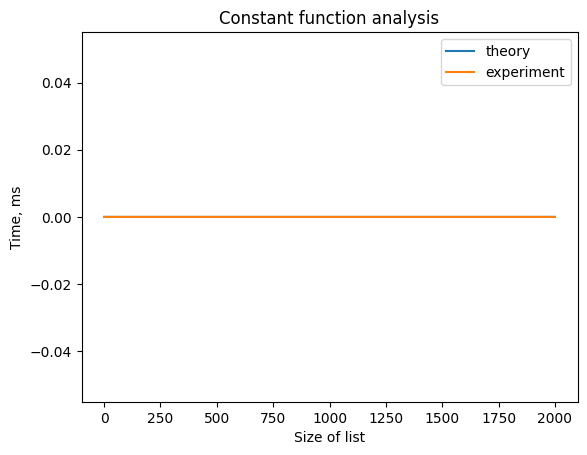

In [30]:
plt.plot(list_time_constant_theory, label='theory')
plt.plot(list_time_constant, label='experiment')
plt.legend()
plt.xlabel('Size of list')
plt.ylabel('Time, ms')
plt.title('Constant function analysis')

The result is expected, but we see sometimes lead time is more than 0ms. It can be due to the computer memory organization.

In [10]:
popt, pcov = curve_fit(constant, list(range(1, 2001)), list_time_sum)
list_time_sum_theory = [constant(i, *popt) for i in range(1, 2001)]

Text(0.5, 1.0, 'Sum function analysis')

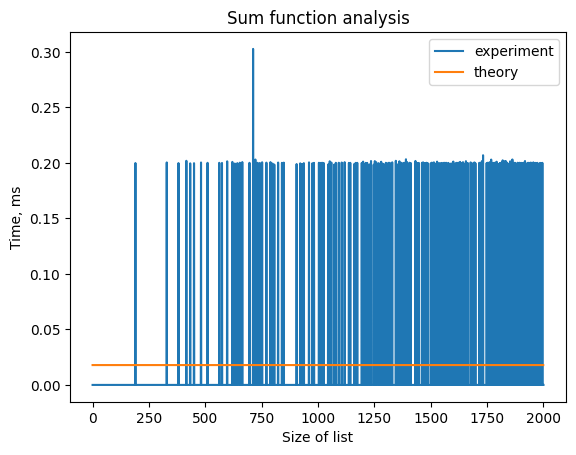

In [11]:
plt.plot(list_time_sum, label='experiment')
plt.plot(list_time_sum_theory, label='theory')
plt.legend()
plt.xlabel('Size of list')
plt.ylabel('Time, ms')
plt.title('Sum function analysis')

The result is expected, but we also see sometimes lead time is more than 0ms and it happens more times due to sum operation being more complicated than constant function.

In [13]:
popt, pcov = curve_fit(linear, list(range(1, 2001)), list_time_prod[1:])
list_time_prod_theory = [constant(i, *popt) for i in range(1, 2001)]

Text(0.5, 1.0, 'Prod function analysis')

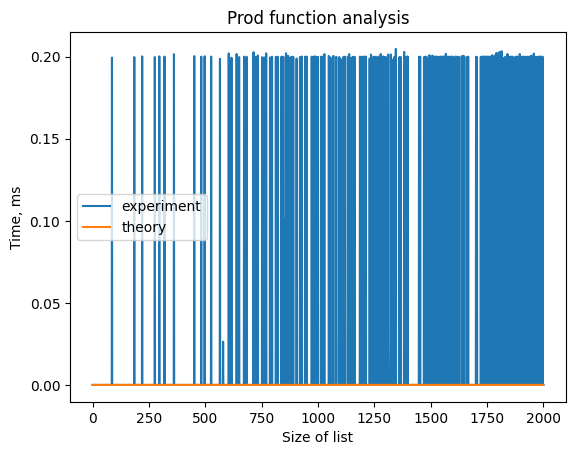

In [14]:
plt.plot(list_time_prod, label='experiment')
plt.plot(list_time_prod_theory, label='theory')
plt.legend()
plt.xlabel('Size of list')
plt.ylabel('Time, ms')
plt.title('Prod function analysis')

The result is expected, but we also see sometimes lead time is more than 0ms, and it happens especially when the size is becoming larger than 0.

In [15]:
popt, pcov = curve_fit(linear, list(range(0, 2001)), list_time_polynom_horner)
list_time_polynom_horner_theory = [linear(i, *popt) for i in range(1, 2001)]

popt, pcov = curve_fit(n_ln, list(range(1, 2001)), list_time_polynom[1:])
list_time_polynom_theory = [n_ln(i, *popt) for i in range(1, 2001)]

Text(0.5, 1.0, 'Polynom function analysis')

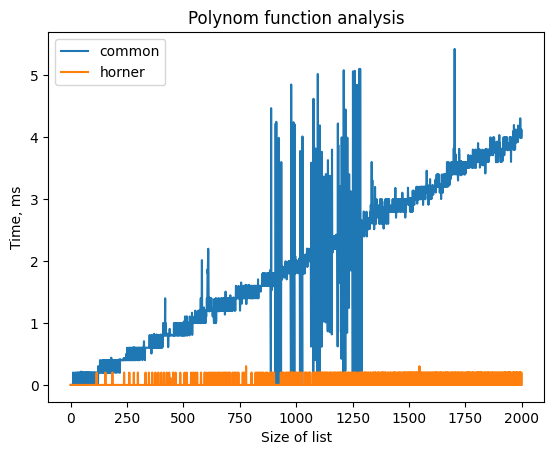

In [16]:
plt.plot(list_time_polynom, label='common')
plt.plot(list_time_polynom_horner, label='horner')
plt.legend()
plt.xlabel('Size of list')
plt.ylabel('Time, ms')
plt.title('Polynom function analysis')

Text(0.5, 1.0, 'Standart Polynom Algorithm')

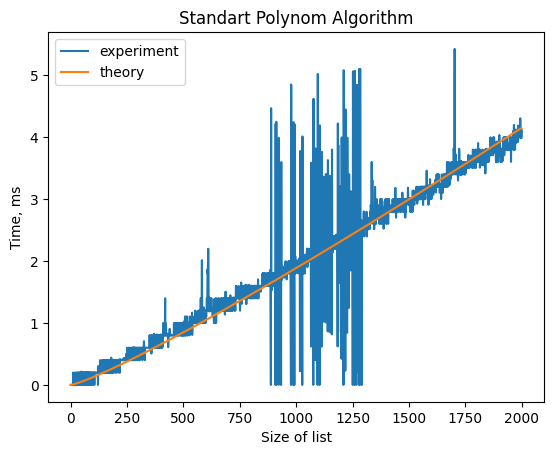

In [17]:
plt.plot(list_time_polynom, label='experiment')
plt.plot(list_time_polynom_theory, label='theory')
plt.legend()
plt.xlabel('Size of list')
plt.ylabel('Time, ms')
plt.title('Standart Polynom Algorithm')

Text(0.5, 1.0, 'Horner Polynom Algorithm')

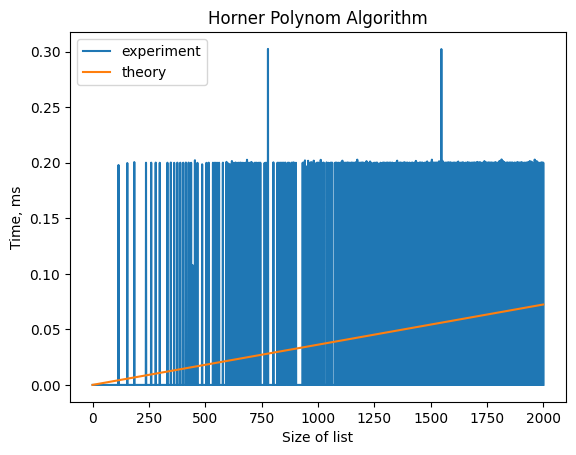

In [18]:
plt.plot(list_time_polynom_horner, label='experiment')
plt.plot(list_time_polynom_horner_theory, label='theory')
plt.legend()
plt.xlabel('Size of list')
plt.ylabel('Time, ms')
plt.title('Horner Polynom Algorithm')

The result is expected. Horner method average time O(n), the basic method O($n \log(n)$) because degree operation lasts O($log(n)$) time and we do it n times. And we can see how the common plot is growing. 

In [19]:
popt, pcov = curve_fit(quadratic, list(range(1, 2001)), list_time_bubble_sort[1:])
list_time_bubble_sort_theory = [quadratic(i, *popt) for i in range(1, 2001)]

popt, pcov = curve_fit(n_ln, list(range(1, 2001)), list_time_quick_sort[1:])
list_time_quick_sort_theory = [n_ln(i, *popt) for i in range(1, 2001)]

popt, pcov = curve_fit(n_ln, list(range(1, 2001)), list_time_tim_sort[1:])
list_time_tim_sort_theory = [n_ln(i, *popt) for i in range(1, 2001)]

Text(0.5, 1.0, 'Sort functions analysis')

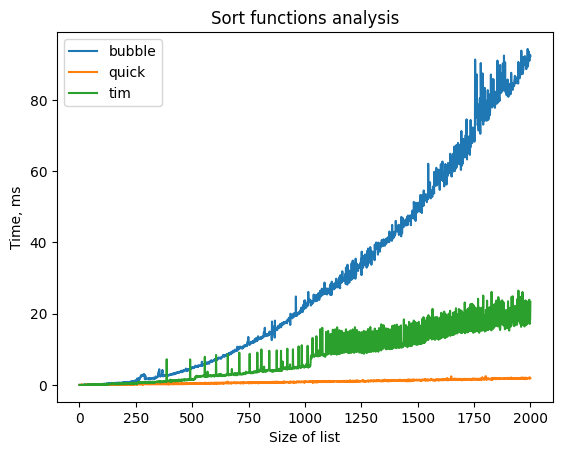

In [20]:
plt.plot(list_time_bubble_sort, label='bubble')
plt.plot(list_time_quick_sort, label='quick')
plt.plot(list_time_tim_sort, label='tim')
plt.legend()
plt.xlabel('Size of list')
plt.ylabel('Time, ms')
plt.title('Sort functions analysis')

Text(0.5, 1.0, 'Bubble Sort')

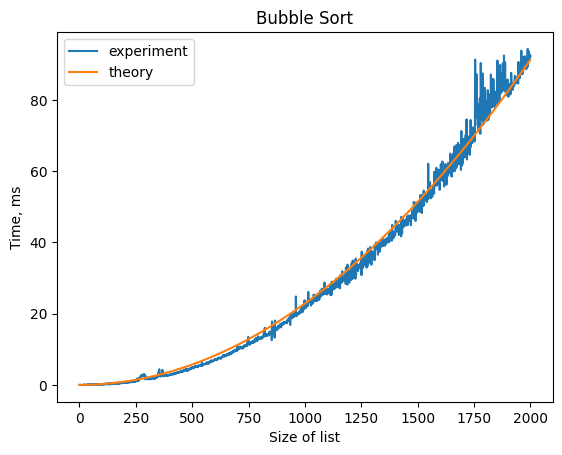

In [21]:
plt.plot(list_time_bubble_sort, label='experiment')
plt.plot(list_time_bubble_sort_theory, label='theory')
plt.legend()
plt.xlabel('Size of list')
plt.ylabel('Time, ms')
plt.title('Bubble Sort')

Text(0.5, 1.0, 'Quick Sort')

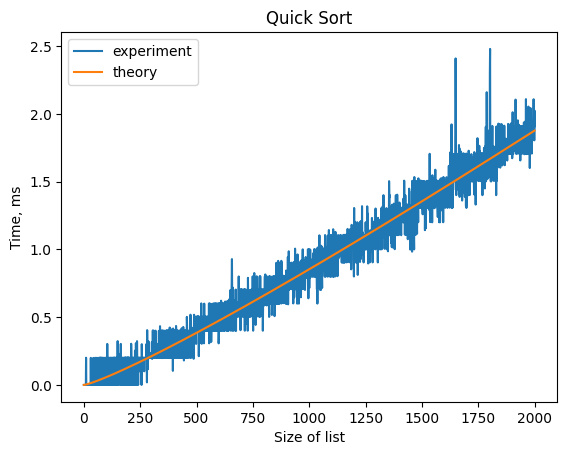

In [22]:
plt.plot(list_time_quick_sort, label='experiment')
plt.plot(list_time_quick_sort_theory, label='theory')
plt.legend()
plt.xlabel('Size of list')
plt.ylabel('Time, ms')
plt.title('Quick Sort')

Text(0.5, 1.0, 'Tim Sort')

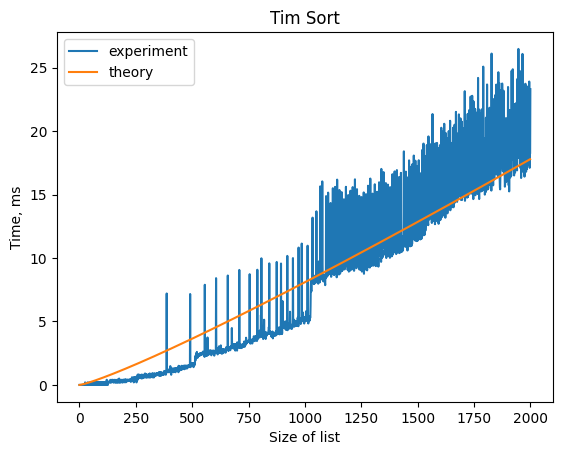

In [23]:
plt.plot(list_time_tim_sort, label='experiment')
plt.plot(list_time_tim_sort_theory, label='theory')
plt.legend()
plt.xlabel('Size of list')
plt.ylabel('Time, ms')
plt.title('Tim Sort')

As we expected we the best result was shown by quick sort, and the worst by bubble sort.

In [24]:
popt, pcov = curve_fit(strange_degree, list(range(1, 2001)), list_time_multiply_matrix[1:])
list_time_multiply_matrix_theory = [strange_degree(i, *popt) for i in range(1, 2001)]

Text(0.5, 1.0, 'Matrix multiply analysis')

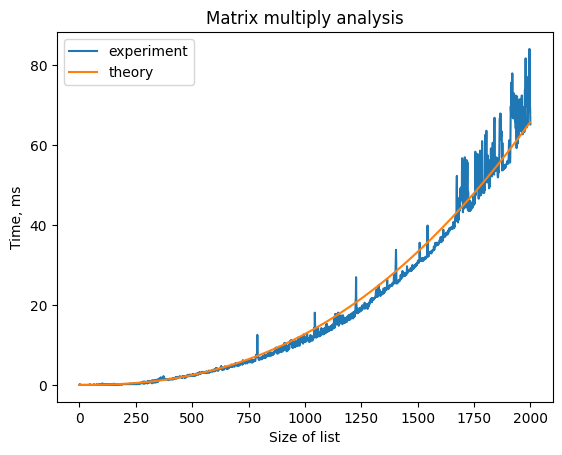

In [25]:
plt.plot(list_time_multiply_matrix, label='experiment')
plt.plot(list_time_multiply_matrix_theory, label='theory')
plt.legend()
plt.xlabel('Size of list')
plt.ylabel('Time, ms')
plt.title('Matrix multiply analysis')

The complexity for the matrix multiplication is O($ n^{\omega + o(1)}$), where $\omega$ is between 2 and 3.  We can see on the plots how the graph is growing when the size is become more.

# Conclusion

Obtained results confirm the theoretical rules, but sometimes we have some optimization from the operating system and the calculated process could last less time, but more often we can see sometimes it can last more time than we expected due to the peculiarities of the computer's memory.